## Q1

**No handwritten homework reports are accepted for this course.**  We work with Git/GitHub.  Efficient and abundant use of Git, e.g., **frequent and well-documented** commits, is an important criterion for grading your homework.

1. If you don't have a GitHub account, apply for the [Student Developer Pack](https://education.github.com/pack) at GitHub using your UCLA email.

2. Create a **private** repository `biostat-257-2023-spring` and add `Hua-Zhou` and `parsajamshidian` (TA) as your collaborators.

3. Top directories of the repository should be `hw1`, `hw2`, ... You may create other branches for developing your homework solutions; but the `master` branch will be your presentation area. Put your homework submission files (Jupyter notebook `.ipynb`, html converted from notebook, all code and data set to reproduce results) in the `master` branch. 

4. After each homework due date, teaching assistant and instructor will check out your `master` branch for grading. Tag each of your homework submissions with tag names `hw1`, `hw2`, ...  Tagging time will be used as your submission time. That means if you tag your hw1 submission after deadline, penalty points will be deducted for late submission.  

5. Read the [style guide](https://github.com/invenia/BlueStyle) for Julia programming. Following rules in the style guide will be strictly enforced when grading: (1) four space indenting rule, (2) 92 charcter rule, (3) space after comma rule, (4) no space before comma rule, (5) space around binary operator rule.

### Q1 answer
Please refer to my [Github repo](https://github.com/yuyuan-lin/biostat-257-2023-spring) for the homework answers.

## Q2

Let's check whether floating-point numbers obey certain algebraic rules. For 2-5, one counter-example suffices.

1. Associative rule for addition says `(x + y) + z == x + (y + z)`. Check association rule using `x = 0.1`, `y = 0.1` and `z = 1.0` in Julia. Explain what you find.

2. Do floating-point numbers obey the associative rule for multiplication: `(x * y) * z == x * (y * z)`?

3. Do floating-point numbers obey the distributive rule: `a * (x + y) == a * x + a * y`?  

4. Is `0 * x == 0` true for all floating-point number `x`? 

5. Is `x / a == x * (1 / a)` always true?

### Q2 answer
#### Part 1
The association rule of addition does not always hold in Julia. The reason is that real numbers are stored as a limited number of binary codes (0/1) in the computer, and it will be rounded if the decimal part cannot be written as a sum of $1/2^i$. This rounding issue causes the imprecision of float calculation we see here.

In [1]:
x = 0.1; y = 0.1; z = 1
println((x + y) + z)
println(x + (y + z))
println((x + y) + z == x + (y + z))

1.2
1.2000000000000002
false


#### Part 2
The association rule of multiplication does not always hold in Julia. The reason is similar (float precision).

In [3]:
x = 0.1; y = 0.2; z = 0.3
println((x * y) * z)
println(x * (y * z))
println((x * y) * z == x * (y * z))

0.006000000000000001
0.006
false


#### Part 3
The distributive rule does not always hold in Julia. The reason is similar (float precision).

In [4]:
x = 0.1; y = 0.2; z = 0.3
println((x + y) * z)
println(x * z + y * z)
println((x + y) * z == x * z + y * z)

0.09000000000000001
0.09
false


#### Part 4
Multiplying any normal float number by 0 will give a 0. However, some special values such as `NaN` and `Inf` are also stored as `Float64`. Multiplying these special float values by 0 will NOT give a 0. 

In [5]:
a = rand(Float64)
println(a * 0)
println(Inf * 0)
println(NaN * 0)

0.0
NaN
NaN


#### Part 5
It is not always true as shown below.

In [9]:
a, b = rand(Float64, 2)
println(a / b)
println(a * (1 / b))
println(a / b == a * (1 / b))

2.7819977586697
2.7819977586697004
false


## Q3

Consider Julia function
```julia
function g(k)
    for i in 1:10
        k = 5k - 1
    end
    k
end
```
1. Use `@code_llvm` to find the LLVM bitcode of compiled `g` with `Int64` input.   
2. Use `@code_llvm` to find the LLVM bitcode of compiled `g` with `Float64` input.  
3. Compare the bitcode from questions 1 and 2. What do you find?  
4. Read Julia documentation on `@fastmath` and repeat the questions 1-3 on the function  

```julia
function g_fastmath(k)  
    @fastmath for i in 1:10  
        k = 5k - 1
    end
    k
end
```
Explain what does the macro `@fastmath` do? And why are the bitcodes for `g` and `g_fastmath` with `Float64` input different? (Hint: Q2)

### Q3 answer
#### Part 1

In [1]:
function g(k)
    for i in 1:10
        k = 5k - 1
    end
    k
end

@code_llvm g(1::Int64)

;  @ /Users/yuyuanlin/Documents/UCLA_files/course_work/BIS_M257/hw/biostat-257-2023-spring/hw1/hw01sol.ipynb:1 within `g`
define i64 @julia_g_717(i64 signext %0) #0 {
top:
;  @ /Users/yuyuanlin/Documents/UCLA_files/course_work/BIS_M257/hw/biostat-257-2023-spring/hw1/hw01sol.ipynb:3 within `g`
; ┌ @ int.jl:88 within `*`
   %1 = mul i64 %0, 9765625
; └
; ┌ @ int.jl:86 within `-`
   %2 = add i64 %1, -2441406
; └
;  @ /Users/yuyuanlin/Documents/UCLA_files/course_work/BIS_M257/hw/biostat-257-2023-spring/hw1/hw01sol.ipynb:5 within `g`
  ret i64 %2
}


#### Part 2

In [2]:
@code_llvm g(1.0::Float64)

;  @ /Users/yuyuanlin/Documents/UCLA_files/course_work/BIS_M257/hw/biostat-257-2023-spring/hw1/hw01sol.ipynb:1 within `g`
define double @julia_g_938(double %0) #0 {
top:
;  @ /Users/yuyuanlin/Documents/UCLA_files/course_work/BIS_M257/hw/biostat-257-2023-spring/hw1/hw01sol.ipynb:3 within `g`
; ┌ @ promotion.jl:389 within `*` @ float.jl:385
   %1 = fmul double %0, 5.000000e+00
; └
; ┌ @ promotion.jl:390 within `-` @ float.jl:384
   %2 = fadd double %1, -1.000000e+00
; └
; ┌ @ promotion.jl:389 within `*` @ float.jl:385
   %3 = fmul double %2, 5.000000e+00
; └
; ┌ @ promotion.jl:390 within `-` @ float.jl:384
   %4 = fadd double %3, -1.000000e+00
; └
; ┌ @ promotion.jl:389 within `*` @ float.jl:385
   %5 = fmul double %4, 5.000000e+00
; └
; ┌ @ promotion.jl:390 within `-` @ float.jl:384
   %6 = fadd double %5, -1.000000e+00
; └
; ┌ @ promotion.jl:389 within `*` @ float.jl:385
   %7 = fmul double %6, 5.000000e+00
; └
; ┌ @ promotion.jl:390 within `-` @ float.jl:384
   %8 = fadd double %7, -1

#### Part 3
Comparing the LLVM bitcodes from Part 1 and 2, we can see that the bitcode for `g` with `Int64` input is much simpler than that for `g` with `Float64` input. This is because the method for `Int64` input is much simpler than that for `Float64` input. 

#### Part 4

In [3]:
function g_fastmath(k)  
    @fastmath for i in 1:10  
        k = 5k - 1
    end
    k
end

@code_llvm g_fastmath(1::Int64)

;  @ /Users/yuyuanlin/Documents/UCLA_files/course_work/BIS_M257/hw/biostat-257-2023-spring/hw1/hw01sol.ipynb:1 within `g_fastmath`
define i64 @julia_g_fastmath_941(i64 signext %0) #0 {
top:
;  @ /Users/yuyuanlin/Documents/UCLA_files/course_work/BIS_M257/hw/biostat-257-2023-spring/hw1/hw01sol.ipynb:3 within `g_fastmath`
; ┌ @ fastmath.jl:270 within `mul_fast`
; │┌ @ int.jl:88 within `*`
    %1 = mul i64 %0, 9765625
; └└
; ┌ @ fastmath.jl:270 within `sub_fast`
; │┌ @ int.jl:86 within `-`
    %2 = add i64 %1, -2441406
; └└
;  @ /Users/yuyuanlin/Documents/UCLA_files/course_work/BIS_M257/hw/biostat-257-2023-spring/hw1/hw01sol.ipynb:5 within `g_fastmath`
  ret i64 %2
}


In [4]:
@code_llvm g_fastmath(1.0::Float64)

;  @ /Users/yuyuanlin/Documents/UCLA_files/course_work/BIS_M257/hw/biostat-257-2023-spring/hw1/hw01sol.ipynb:1 within `g_fastmath`
define double @julia_g_fastmath_943(double %0) #0 {
top:
;  @ /Users/yuyuanlin/Documents/UCLA_files/course_work/BIS_M257/hw/biostat-257-2023-spring/hw1/hw01sol.ipynb:3 within `g_fastmath`
; ┌ @ fastmath.jl:267 within `mul_fast` @ fastmath.jl:167
   %1 = fmul fast double %0, 0x4162A05F20000000
; └
; ┌ @ fastmath.jl:267 within `sub_fast` @ fastmath.jl:166
   %2 = fadd fast double %1, 0xC142A05F00000000
; └
;  @ /Users/yuyuanlin/Documents/UCLA_files/course_work/BIS_M257/hw/biostat-257-2023-spring/hw1/hw01sol.ipynb:5 within `g_fastmath`
  ret double %2
}


The macro `@fastmath` executes a transformed version of the expression, which calls functions that may violate strict IEEE semantics. This allows the fastest possible. This may reduce the precision of float numbers, and cause numerical changes. The LLVM bitcode for `g_fastmath` with `Float64` input is as long as that for `g` or `g_fastmath` with `Int64` input, which is much simpler than that for `g` with `Float64` input.

## Q4

Create the vector `x = (0.988, 0.989, 0.990, ..., 1.010, 1.011, 1.012)`.   

1. Plot the polynomial `y = x^7 - 7x^6 + 21x^5 - 35x^4 + 35x^3 - 21x^2 + 7x - 1` at points `x`.  

2. Plot the polynomial `y = (x - 1)^7` at points `x`.  

3. Explain what you found.

### Q4 answer
The part 1 and 2 are shown below.

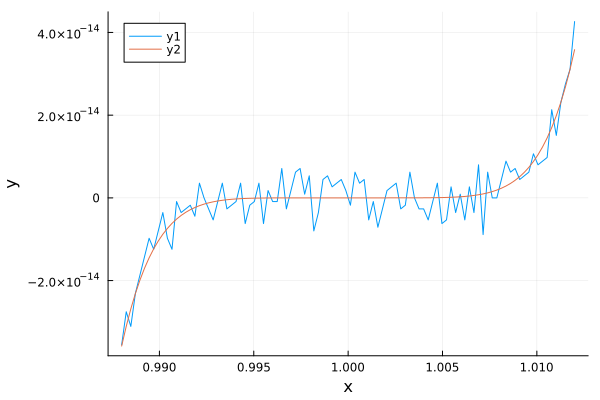

In [9]:
# generate the data
x = range(start = 0.988, stop = 1.012, length = 100)
y1 = x.^7 .- 7x.^6 .+ 21x.^5 .- 35x.^4 .+ 35x.^3 .- 21x.^2 .+ 7x .- 1
y2 = (x .- 1).^7

# plot
using Plots
plot(x, y1, xlabel = "x", ylabel = "y", legend =:topleft)
plot!(x, y2)

#### Part 3
As shown above, these two function are mathematically equivalent. However, the plots are not the same, as the first function shows a noisy pattern and the second function plot is more stable. This is because the first function is much more sensitive to the precision of float numbers. 

## Q5

1. Show the **Sherman-Morrison formula**
$$
	(\mathbf{A} + \mathbf{u} \mathbf{u}^T)^{-1} = \mathbf{A}^{-1} - \frac{1}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}} \mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T \mathbf{A}^{-1},
$$
where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is nonsingular and $\mathbf{u} \in \mathbb{R}^n$. This formula supplies the inverse of the symmetric, rank-one  perturbation of $\mathbf{A}$.

2. Show the **Woodbury formula**
$$
	(\mathbf{A} + \mathbf{U} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1},
$$
where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is nonsingular, $\mathbf{U}, \mathbf{V} \in \mathbb{R}^{n \times m}$, and $\mathbf{I}_m$ is the $m \times m$ identity matrix. In many applications $m$ is much smaller than $n$. Woodbury formula generalizes Sherman-Morrison and is valuable because the smaller matrix $\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}$ is cheaper to invert than the larger matrix $\mathbf{A} + \mathbf{U} \mathbf{V}^T$.

3. Show the **binomial inversion formula**
$$
	(\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1},
$$
where $\mathbf{A}$ and $\mathbf{B}$ are nonsingular.

4. Show the identity
$$
	\text{det}(\mathbf{A} + \mathbf{U} \mathbf{V}^T) = \text{det}(\mathbf{A}) \text{det}(\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}).
$$
This formula is useful for evaluating the density of a multivariate normal with covariance matrix $\mathbf{A} + \mathbf{U} \mathbf{V}^T$.

**Hint**: 1 and 2 are special cases of 3. For 4, show that
$$
\begin{pmatrix}
- \mathbf{A} & \mathbf{O} \\
\mathbf{O} & \mathbf{I} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}
\end{pmatrix} = \begin{pmatrix}
\mathbf{I} & \mathbf{O} \\
\mathbf{V}^T \mathbf{A}^{-1} & \mathbf{I}
\end{pmatrix} \begin{pmatrix}
- \mathbf{A} & \mathbf{U} \\
\mathbf{V}^T & \mathbf{I}
\end{pmatrix} \begin{pmatrix}
\mathbf{I} & \mathbf{A}^{-1} \mathbf{U} \\
\mathbf{O} & \mathbf{I}
\end{pmatrix}.
$$

## Q6

Demonstrate the following facts about triangular and orthogonal matrices in Julia (one numerical example for each fact). Mathematically curious ones are also encouraged to prove them. 

Note a unit triangular matrix is a triangular matrix with all diagonal entries being 1.

1. The product of two upper (lower) triangular matrices is upper (lower) triangular.

2. The inverse of an upper (lower) triangular matrix is upper (lower) triangular.

3. The product of two unit upper (lower) triangular matrices is unit upper (lower) triangular.

4. The inverse of a unit upper (lower) triangular matrix is unit upper (lower) triangular.

5. An orthogonal upper (lower) triangular matrix is diagonal. (You just need to prove this.)

6. The product of two orthogonal matrices is orthogonal.

## Q7

Let the $n \times n$ matrix `H` have elements `H[i, j] = 1 / (i + j - 1)`.  

1. Write a function `h(n)` that outputs $n \times n$ matrix `H`. Try at least 4 ways, e.g., $ij$-looping, $ji$-looping, [comprehension](https://docs.julialang.org/en/v1/manual/arrays/#man-comprehensions), and vectorization (R style). Compute and print `H` for `n = 5`.   

2. Compare their efficiencies (using `BenchmarkTools`) at `n = 5000`.